<a href="https://colab.research.google.com/github/mahipal2qa/mahipal2qa/blob/main/magicgammatelescope.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

[dataset sourced by uci dataset repository](https://archive.ics.uci.edu/dataset/159/magic+gamma+telescope)

In [ ]:
cols =["fLength","fWidth","fSize","fConc","fConc1","fAsym","fM3Long","fM3Trans","fAlpha","fDist","class"]
df = pd.read_csv("magic04.data",names=cols)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [ ]:
  df["class"] = (df["class"]== "g").astype(int)
  df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


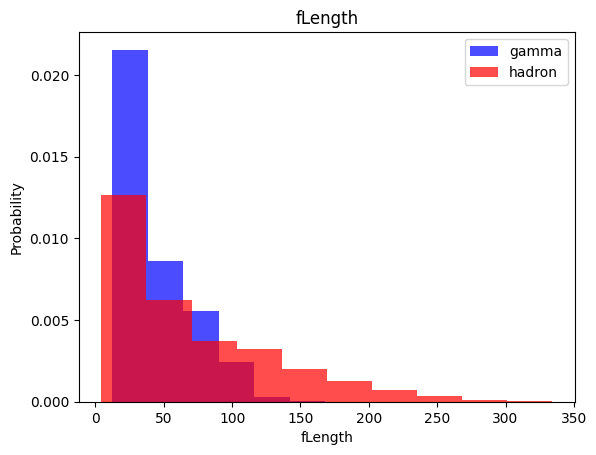

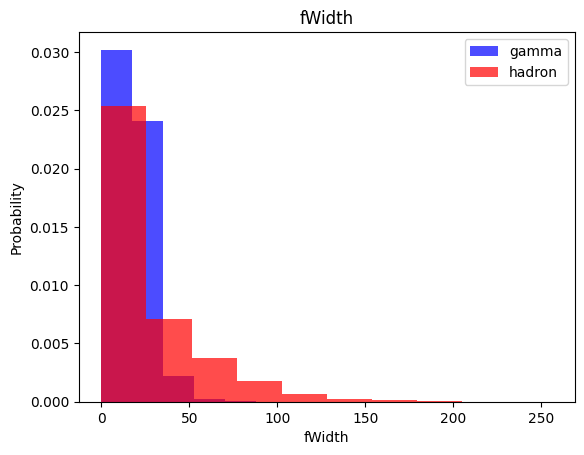

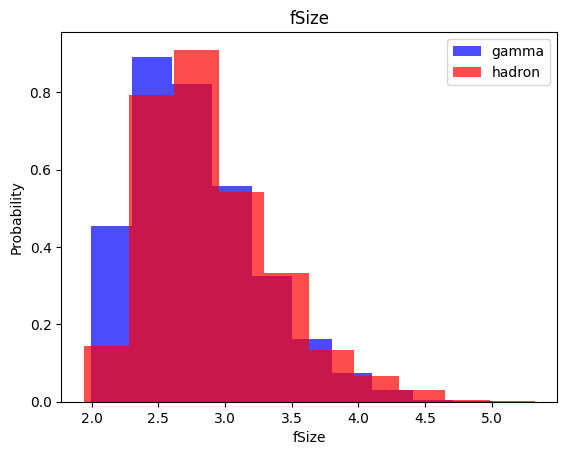

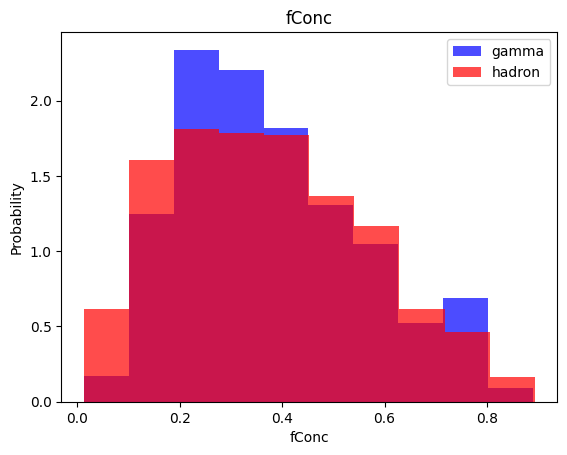

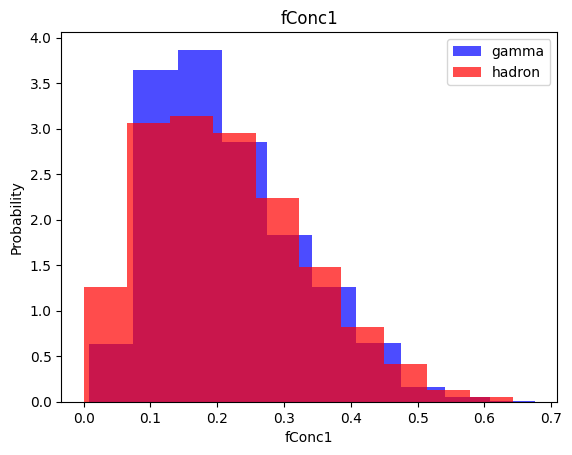

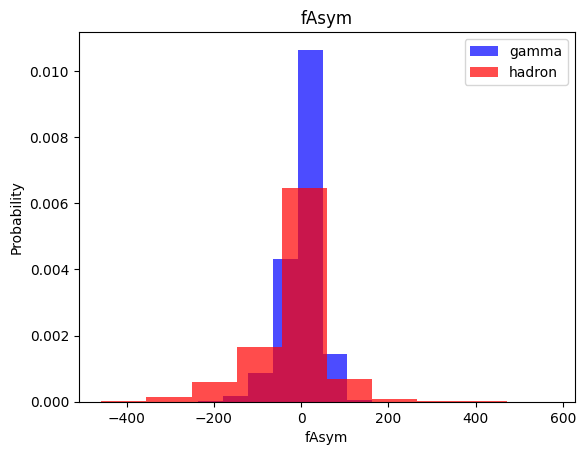

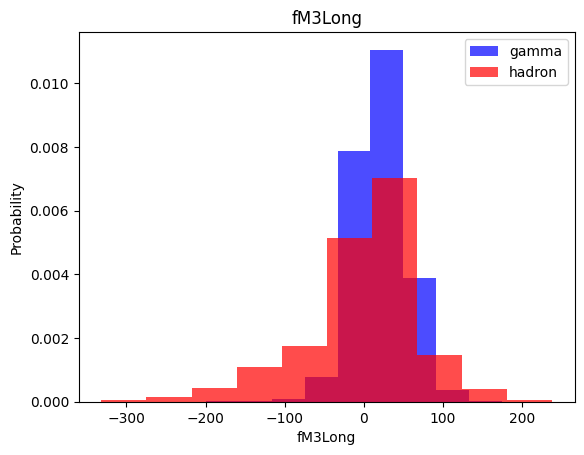

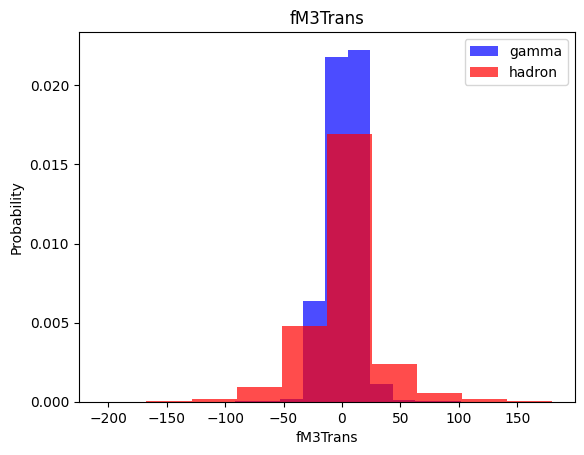

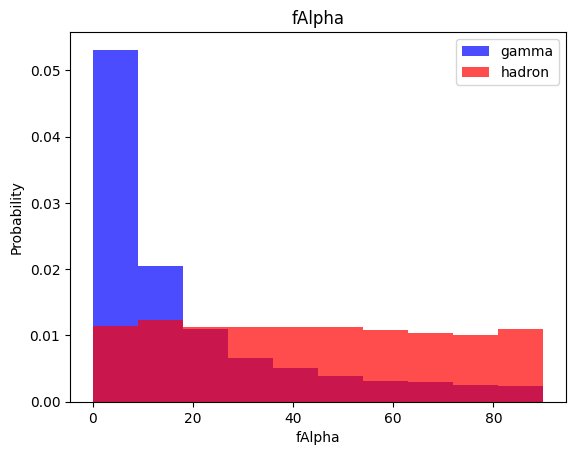

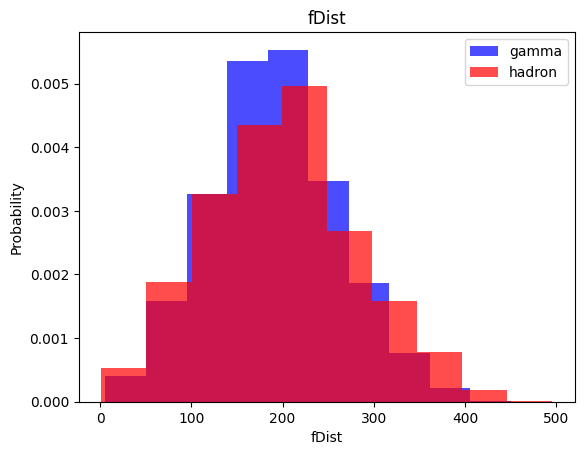

In [ ]:
for label in cols[:-1]:
  plt.hist(df[df["class"]==1][label],color="blue",label="gamma",alpha=0.7,density=True)
  plt.hist(df[df["class"]==0][label],color="red",label="hadron",alpha=0.7,density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

Train validation and test

In [ ]:
train, valid, test = np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [ ]:
def scale_dataset(dataframe,oversample=False):
  x = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values
  scaler = StandardScaler()
  x = scaler.fit_transform(x)

  if oversample:
    ros = RandomOverSampler()
    x,y = ros.fit_resample(x,y)

  data = np.hstack((x,np.reshape(y,(-1,1))))

  return data,x,y

In [ ]:
train,x_train,y_train = scale_dataset(train,oversample=True)
valid,x_valid,y_valid = scale_dataset(valid,oversample=False)
test,x_test,y_test = scale_dataset(test,oversample=False)

kNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
y_pred = knn_model.predict(x_test)

In [ ]:
y_pred

array([0, 1, 1, ..., 1, 1, 1])

In [ ]:
y_test

array([1, 0, 1, ..., 1, 0, 1])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.69      0.72      1330
           1       0.84      0.88      0.86      2474

    accuracy                           0.81      3804
   macro avg       0.80      0.78      0.79      3804
weighted avg       0.81      0.81      0.81      3804



In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb_model = GaussianNB()
nb_model = nb_model.fit(x_train,y_train)

In [ ]:
y_pred = nb_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.42      0.52      1330
           1       0.74      0.90      0.82      2474

    accuracy                           0.73      3804
   macro avg       0.72      0.66      0.67      3804
weighted avg       0.73      0.73      0.71      3804



Log Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lg_model = logisticRegression(solver="lbfgs",max_iter=1000)
lg_model = lg_model.fit(x_train,y_train)

In [ ]:
y_pred = lg_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.72      0.70      1330
           1       0.85      0.82      0.84      2474

    accuracy                           0.79      3804
   macro avg       0.77      0.77      0.77      3804
weighted avg       0.79      0.79      0.79      3804



SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_model = SVC()
svm_model = svm_model.fit(x_train,y_train)

In [ ]:
y_pred = svm_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.79      0.80      1330
           1       0.89      0.90      0.89      2474

    accuracy                           0.86      3804
   macro avg       0.85      0.84      0.85      3804
weighted avg       0.86      0.86      0.86      3804



Neural Network with tensorflow


In [ ]:
import tensorflow as tf

In [ ]:
def train_model(x_train, y_train, num_nodes, dropout_prob, lr, epochs, batch_size):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes,activation="relu",input_shape=(10,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes,activation="relu"),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1,activation="sigmoid")
  ])
  nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.001),loss="binary_crossentropy",
                 metrics=["accuracy"])
  history = nn_model.fit(
    x_train,y_train,epochs=epochs,batch_size=batch_size,validation_split=0.2,verbose=0
    )
  return nn_model,history



In [ ]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2,figure=(10,4))
  ax2.plot(history.history["accuracy"],label="accuracy")
  ax2.plot(history.history["val_accuracy"],label="val_accuracy")
  ax2.set_xlabel("Epoch")
  ax2.set_ylabel("Accuracy")
  ax2.grid(True)

  ax1.plot(history.history["loss"],label="loss")
  ax1.plot(history.history["val_loss"],label="val_loss")
  ax1.set_xlabel("Epoch")
  ax1.set_ylabel("Binary crossentropy")
  ax1.grid(True)
  plt.show()

In [ ]:
least_val_loss = float("inf")
least_loss_model = None
epochs=100
for num_nodes in [16,32,64]:
  for dropout_prob in [0,0.2]:
    for lr in [0.01,0.005,0.001]:
      for batch_size in [32,64,128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
        model,history = train_model(x_train,y_train,num_nodes,dropout_prob,lr,batch_size, epochs)
        plot_history(history)
        val_loss,val_acc = model.evaluate(x_valid,y_valid)
        print(f"Validation acc: {val_acc}")
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model

16 nodes, dropout 0, lr 0.01, batch size 32


KeyboardInterrupt: 

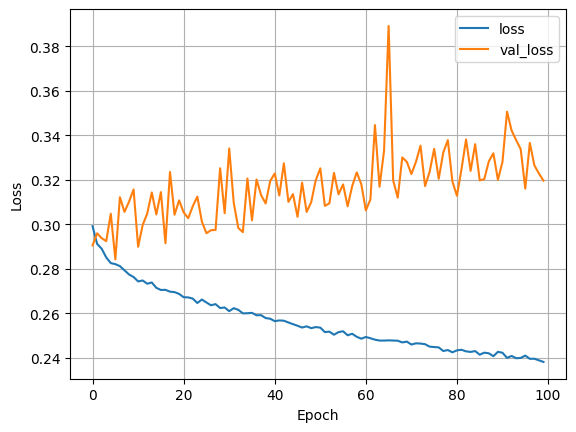

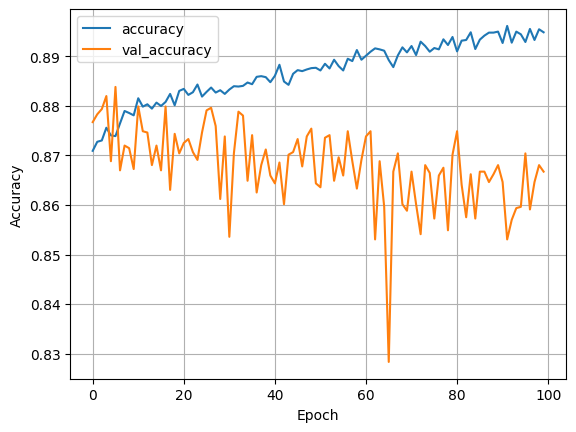

In [ ]:
plot_loss(history)
plot_accuracy(history)

In [ ]:
y_pred = least_loss_model.predict(x_test,y_test)
y_pred = (y_pred>0.5).astype(int).reshape(-1,)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()